# [NTDS'17] assignment 2: network models
[ntds'17]: https://github.com/mdeff/ntds_2017

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](http://lts4.epfl.ch)

For this assignment we will work on a network representing the collaboration between scientists in the field of General Relativity and Quantum Cosmology. The network comes from [SNAP](http://snap.stanford.edu/data/ca-GrQc.html) and is described as follows:

> Arxiv GR-QC (General Relativity and Quantum Cosmology) collaboration network is from the e-print [arXiv](https://arxiv.org) and covers scientific collaborations between authors papers submitted to General Relativity and Quantum Cosmology category. If an author *i* co-authored a paper with author *j*, the graph contains a undirected edge from *i* to *j*. If the paper is co-authored by *k* authors this generates a completely connected (sub)graph on *k* nodes. The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv.

In [1]:
%matplotlib inline

import os
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
G = nx.read_edgelist(os.path.join('..', 'data', 'arxiv_collaboration_network.txt'))

In [3]:
print('My network has {} nodes.'.format(len(G.nodes())))
print('My network has {} edges.'.format(G.size()))

My network has 5242 nodes.
My network has 14496 edges.


## 1. Comparing to model networks

1.1 In this part of the assignment, you have to create an Erdős–Rényi and Barabási-Albert graph using NetworkX, and compare them to the collaboration network. Try to simulate the original network as best as you can. When choosing parameters for the networks, take into account the number of vertices and edges of the original network. The number of vertices should be exactly the same. Comment on your choice of parameters.

In [4]:
# Your code here.
V = len(G.nodes())
E = G.size()

In [5]:
#For Erdos Renyi Graph
#Expected number of edges = Total possible edges * probability of forming an edge between any two nodes
p = E / (V * (V - 1) / 2)
er = nx.erdos_renyi_graph(V, p)

In [6]:
#For Barabasi Albert Graph
#Number of links = m * Number of nodes
if np.modf(E / V)[0] > 0.5:
    m = int(np.ceil(E / V))
else:
    m = int(np.floor(E / V))
ba = nx.barabasi_albert_graph(V, m)

**Your answer here.**

In [7]:
print('My Erdős–Rényi network has {} nodes.'.format(len(er.nodes())))
print('My Erdős–Rényi network has {} edges.'.format(er.size()))
print('My Barabási-Albert network has {} nodes.'.format(len(ba.nodes())))
print('My Barabási-Albert network has {} edges.'.format(ba.size()))

My Erdős–Rényi network has 5242 nodes.
My Erdős–Rényi network has 14675 edges.
My Barabási-Albert network has 5242 nodes.
My Barabási-Albert network has 15717 edges.


1.2 Check the size of the largest connected component in each graph and compare them to the original network. In the Erdős–Rényi model, what should the probability of creating each edge be in order to have the same expected size of the largest component? Justify. Generate a graph with this parameter to check if you indeed get a similar value.

In [8]:
giant_G = max(nx.connected_component_subgraphs(G), key=len)
giant_er = max(nx.connected_component_subgraphs(er), key=len)
giant_ba = max(nx.connected_component_subgraphs(ba), key=len)
print(len(giant_G.nodes()))
print(len(giant_er.nodes()))
print(len(giant_ba.nodes()))

4158
5219
5242


Let fraction of nodes not in giant component (GC) be $u = 1 - \frac{N_{g}}{N}$

- for node $i$ not to be part of GC, it has either no link with node $j$ in the GC (probability $1 - p$) or it has a link with $j$, which is however not in the GC (probability $pu$)
- hence, the probability that node $i$ is not linked to GC via any other node $j$ is $u = (1 - p + pu)^{N - 1}$

In [9]:
V_G_or = len(giant_G.nodes())
s = V_G_or / V
u = 1 - s
num = np.power(u, (1 / (V - 1))) - 1
den = u - 1
p_giant = num / den
er_new = nx.erdos_renyi_graph(V, p_giant)
giant_er_new = max(nx.connected_component_subgraphs(er_new), key=len)

**Your answer here.**

In [10]:
# Your code here.
print('The parameter p for an Erdős–Rényi network with the same expected size of the giant component is {}.'.format(p_giant))

# Your code here.
print('The size of the component in a randomly generated network with this parameter is {}.'.format(len(giant_er_new.nodes())))

The parameter p for an Erdős–Rényi network with the same expected size of the giant component is 0.00037905457554677585.
The size of the component in a randomly generated network with this parameter is 4131.


1.3 Look at the clustering coefficient of the original network. Is there a network model we talked about that could have a clustering coefficient that is close? Explain.

In [11]:
print('Clustering coefficient of Original Graph : {}'.format(nx.average_clustering(G)))
print('Clustering coefficient of Erdos Graph : {}'.format(nx.average_clustering(er)))
print('Clustering coefficient of Barabasi Graph : {}'.format(nx.average_clustering(ba)))

Clustering coefficient of Original Graph : 0.529635811052136
Clustering coefficient of Erdos Graph : 0.0008340614407001275
Clustering coefficient of Barabasi Graph : 0.007921381290157814


**Your answer here.** Maybe the Bianconi Barabasi Model can have closer clustering coefficient since it accounts for the fact that nodes with different internal characteristics acquire links at different rate which is determined by its `fitness`. `Fitness` of a research publication allows us to measure its future impact. While most research papers acquire only a few citations, a small number of publications collect thousands and even tens of thousands of citations. This extended ability to calculate fitness makes Bianconi Barabasi Model emulate the network much better.

## 2. Creating a network with a predefined degree distribution

In this part of the assignment, you will have to create a random network from a predefined degree distribution. There are several network models which can create a random network with the exact same degree distribution as the original, or with the same expected distribution as the original. Refer to section 4.8 of [the Barabási book](http://networksciencebook.com) for more information.

One of the most famous ones is the configuration model. The model for a graph with $L$ edges in total is constructed in the following steps:

- Assign a degree to each node, represented as stubs (half-links). The degree sequence is either generated analytically from a preselected distribution, or it is extracted from the adjacency matrix of a real network. Note that we must start from an even number of stubs to avoid being left with unpaired stubs.
- Randomly select a stub pair and connect them. Then randomly choose another pair from the remaining $2L - 2$ stubs and connect them. This procedure is repeated until all stubs are paired up.

*Reminder:* A stub is a half-link, representing the half of an edge. It contains one node and can be paired up with another stub to create an edge (between the two corresponding nodes).

2.1 However, this model allows for the creation of multi-links (multiple edges between the same pair of vertices) and self-loops, thus leading to a non-simple graph. In this assignment, you will implement a greedy configuration model, to avoid these problems.

The algorithm goes as follows:
- Extract the degree sequence from our collaboration network.
- Assign a target degree to each node, represented as stubs or half-links. Use the degree sequence extracted from the collaboration network.
- Sort the nodes by degree. 
    - Pick the node with the highest target degree. Delete all its stubs from the list of stubs to make sure we don't create a self loop.
    - Until all its weighted degree equals its target degree: 
        - Randomly select one stub from the list of stubs (corresponding to one of the other nodes), and connect these two nodes. In case the two chosen nodes are already connected, simply increase the weight of this edge by one. Be careful to randomly select from stubs and not from nodes, as this means the chances of selecting a node will be proportional to its target degree.
    - When the number of edges adjacent to this node corresponds to its target degree, go on to the second node in the list. 
    - Repeate this procedure until all stubs are paired up, or there is only one node left with a pair number of stubs. In that case, don't create a self-loop, but discard the stubs.
    
*Hints*: 
 - Use `nx.empty_graph()` to create an empty graph.
 - Use `G.add_edge(node1,node2,weight = 1)` to add an edge to a weighted graph.
 - Use `G.edge[node1][node2]['weight'] += 1` to increment the weight of an edge by one.

In [12]:
from itertools import chain

chaini = chain.from_iterable

def _to_stublist(degree_sequence):
    """
    This function returns a list of node numbers with multiplicities
    according to the given degree sequence. For example, if the first
    element of ``degree_sequence`` is ``3``, then the first node number,
    ``0``, will appear at the head of the returned list three times. The
    node numbers are assumed to be the numbers zero through
    ``len(degree_sequence) - 1``.
    
    """
    return list(chaini([n] * d for n, d in enumerate(degree_sequence)))

In [13]:
def greedy_configuration(degree_distribution):
    # Your code here.
    n = len(degree_distribution)
    G = nx.empty_graph(n)
    
    if n == 0:
        return G
    
    stublist = _to_stublist(degree_distribution)
    
    for node1 in range(n):
        
        target_degree = degree_distribution[node1]
        
        if G.degree(node1, weight = 'weight') == target_degree:
            stublist = list(filter(lambda a: a != node1, stublist))
            continue
        
        stublist = list(filter(lambda a: a != node1, stublist))
        
        for j in range(target_degree - G.degree(node1, weight = 'weight')):
            condition = True
            while condition and not(not stublist):
                node2 = np.random.randint(low = node1 + 1, high = n)
                if node2 in stublist:
                    condition = False
                    stublist.remove(node2)
                    if G.has_edge(node1, node2) == False:
                        G.add_edge(node1,node2,weight = 1)
                    elif G.has_edge(node1, node2) == True:
                        G.edge[node1][node2]['weight'] += 1
                
    return G

In [14]:
degree_distribution=sorted(nx.degree(G).values(),reverse=True) # degree distribution sorted from highest to lowest
gc = greedy_configuration(degree_distribution)

2.2 Verify that the networks have the same number of nodes. Plot the difference between the weighted degree distributions to verify that they are identical. If not, why?

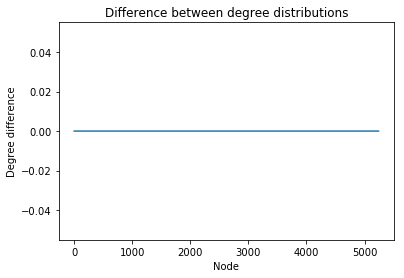

In [15]:
degree_sequence_gc=sorted(nx.degree(gc, weight = 'weight').values(),reverse=True) #weighted degree distribution
# Your code here.
plt.plot(np.array(degree_distribution) - np.array(degree_sequence_gc));
plt.xlabel('Node')
plt.ylabel('Degree difference')
plt.title('Difference between degree distributions');

**Your answer here.** Both distributions are exactly identical.

Sanity Check : Verify that all diagonal elements of the matrix are zero (No self loops).

In [16]:
w = nx.adjacency_matrix(gc)
flag = True
for i in range(w.shape[0]):
    if w[i, i] != 0:
        flag = flag and False
if flag:
    print('Sanity Check passed!')
else:
    print('Error!')

Sanity Check passed!


2.3 Should these two networks have the same adjacency matrices? Justify.

**Your answer here.** No, these networks will not have the same adjacency matrix. Although the degree distribution has been preserved, yet, to match the target degree, individual nodes have been paired up with completely random stubs. This random pairing drastically reduces the possibility of a node getting paired up with its original partner. Hence, adjaceny matrix doesn't remain the same.

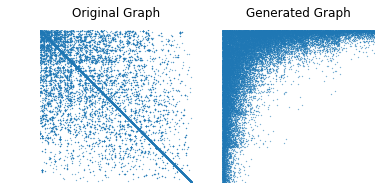

In [17]:
w1 = nx.adjacency_matrix(G)
w2 = nx.adjacency_matrix(gc)
f, (ax1, ax2) = plt.subplots(1, 2)
size = f.get_size_inches()*f.dpi
ax1.set_title('Original Graph')
ax1.axis('off')
ax1.spy(w1, marker = '.', markersize=0.5)
ax2.set_title('Generated Graph')
ax2.spy(w2, marker = '.', markersize=0.5)
ax2.axis('off');

2.4 Draw both the generated and original networks. Are they similar? If not, why? Try to explain.

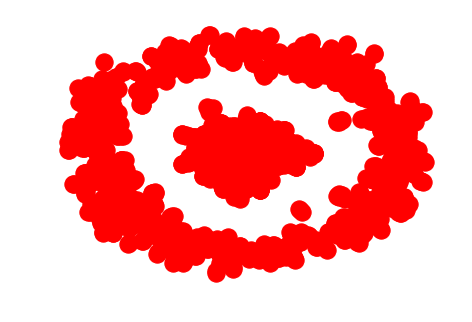

In [18]:
# Your code here.
nx.draw(G)

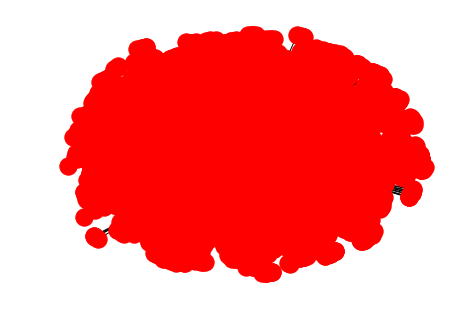

In [19]:
nx.draw(gc)

**Your answer here.** No, the two graphs don't look similar. Similarity in appearance is related to similarity in adjacent matrices because that would mean that many pair of nodes are common in both graphs. Since adjacency matrix isn't the same, hence, we can't expect the graphs to 'look' the same.

2.5 Do you expect the properties studied in the first part of the assignment to be close to the original graph? Justify.

**Your answer here.** I expect the number of edges to be the same. Because the generated graph is statistically similar, i.e., having the same degree distribution. But the same can't be said about giant component or clustering coefficient because their values depend on `p`, which is not preserved during model creation.

In [20]:
print('No. of nodes : {}'.format(len(gc.nodes())))
print('No. of edges : {}'.format(gc.size()))

No. of nodes : 5242
No. of edges : 14460
